# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: Julio Moreno Blanco
*   Alumno 2: Mireia Carbó Feliu
*   Alumno 3: Bryan Duque Gutiérrez






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [1]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/08_MIAR/Proyecto_programacion_APR"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [2]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Mounted at /content/gdrive

Colab: making sure  /content/gdrive/My Drive/08_MIAR/Proyecto_programacion_APR  exists.

Colab: Changing directory to  /content/gdrive/My Drive/08_MIAR/Proyecto_programacion_APR
/content/gdrive/My Drive/08_MIAR/Proyecto_programacion_APR
Archivos en el directorio: 
['.git', 'Proyecto_práctico(1).ipynb', 'requirements.txt', 'Screenshot 2025-06-23 at 09.17.59.png', 'requirements.txt.gdoc', 'POC2', 'model.png', 'POC4', 'Parametros_entrenamientos.xlsx', 'Proyecto_práctico_versionFinal.ipynb', 'old']


---
### 1.4. Instalar librerías necesarias

In [3]:
# Desinstalar versiones incompatibles preinstaladas en Colab
#!pip uninstall -y gym keras keras-nightly keras-Preprocessing keras-vis keras-applications tensorflow

In [4]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12.0

else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.7 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654617 sha256=392f58a7a186bc18f7eaa87b1633689c58ba254e03eeb02b71d25d3138261c63
  Stored in directory: /root/.cache/pip/wheels/07/8b/b7/570cb90b10f17e85ccb291ba1f04af41ec697745104a2263eb
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 3.1.1
    Uninstalling cloudpickle-3.1.1:
      Successfully uninstalled cloudpickle-3.1.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2024.12.1 requires cloud

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

### **Introducción**

El entorno sobre el que vamos a trabajar es SpaceInvaders-v0, que pertenece a la colección de Atari Games disponible en Gymnasium. Es una versión del videojuego Space Invaders, donde controlasuna nave que se mueve lateralmente por la parte inferior de la pantalla y dispara a los enemigos que van bajando de la parte superior de la pantalla.

El **objetivo principal** es sobrevivir y destruir enemigos, y se obtienen recomensas cuando se destruye al enemigo.

Antes de implementar los modelos, debemos tener en cuenta diferentes cosas:


*   Las observaciones son de tipo imagen RGB de 210x160 píxeles con 3 canales. Por lo tanto, nuestro **input** es de tipo imagen.
*   Se pueden realizar diferentes tipos de **acciones**:
    * 0: NOOP (no hacer nada)
    * 1: FIRE (dispara)
    * 2: RIGHT
    * 3: LEFT
    * 4: RIGHTFIRE
    * 5: LEFTFIRE
* **Recompensas**: Cada enemigo destruido da una recompensa positiva. Si pierdes una vida, no necesariamente recibes recompensa negativa, pero el episodio puede terminar.

#### Importar librerías

In [1]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Dense, Activation, Flatten, Convolution2D, Permute, Input,
                                     SeparableConv2D, Lambda, Subtract, Add, Conv2D,
                                     DepthwiseConv2D, BatchNormalization, ReLU, InputLayer)
#from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam

import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

import os
import tensorflow as tf
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
import time
from tensorflow.keras.callbacks import Callback
from rl.callbacks import FileLogger


import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
path = 'POC2'

# Define subdirectorios
videos_path = os.path.join(path, 'videos')
modelos_path = os.path.join(path, 'modelos')

# Crear directorios si no existen
os.makedirs(videos_path, exist_ok=True)
os.makedirs(modelos_path, exist_ok=True)

### **Configuración base**

In [3]:
# Parámetros
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

# Entorno
env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [4]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [5]:
print("Numero de acciones disponibles: " + str(nb_actions))

Numero de acciones disponibles: 6


In [6]:
print("Formato de las observaciones:")
env.observation_space

Formato de las observaciones:


Box(0, 255, (210, 160, 3), uint8)

Tal y como hemos visto, vamos a trabajar con las 6 acciones mencionadas anteriormente y con imágenes RGB de 210x160 píxeles y valores de intensidad de 0 a 255, lo cual es una entrada de alta dimensionalidad y con información que, en nuestro caso, puede ser rebundante o irrelevante para la toma de decisiones.

Es por ello que creemos que puede ser mejor aplicar un preprocesamiento de la imagen, a una conversion de tonos grises, y reescalando la imagen.




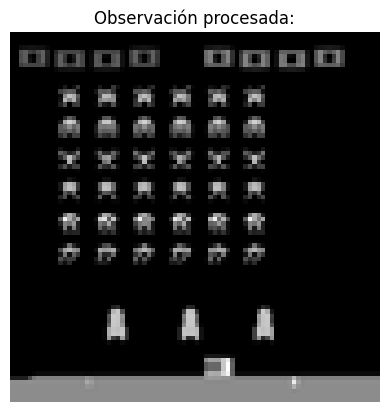

In [7]:
# Obtener un estado inicial del entorno
obs = env.reset()
processor = AtariProcessor()

# Procesar la observación
processed_obs = processor.process_observation(obs)

# Mostrar imagen procesada
plt.imshow(processed_obs, cmap='gray')
plt.title("Observación procesada:")
plt.axis('off')
plt.show()

## **1. Implementación de la red neuronal**

Los hiperparámetros de la red neuronal aplicados son:

In [8]:

LEARNING_RATE = 0.0005

GAMMA = 0.99
TARGET_MODEL_UPDATE = 10000
DELTA_CLIP = 1.0
TRAIN_INTERVAL = 4

### MODELO 4

In [9]:
def create_mobile_like_dqn(input_shape, num_actions):
    x_in = Input(shape=(input_shape[0], input_shape[1], input_shape[2]))
    x = Permute((2, 3, 1))(x_in)  # (84,84,frames)
    # Primer conv estándar ligero
    x = Conv2D(16, (3, 3), strides=2, padding='same')(x)  # ~(42x42x16)
    x = BatchNormalization()(x); x = ReLU()(x)
    # Bloque depthwise-pointwise
    def dw_pw(block_input, filters, strides):
        y = DepthwiseConv2D((3,3), strides=strides, padding='same')(block_input) # aplica una convolución 3x3 a cada canal por separado
        y = BatchNormalization()(y); y = ReLU()(y)
        y = Conv2D(filters, (1,1), padding='same')(y) # combina los canales resultantes, aprendiendo cómo mezclarlos (pointwise)
        y = BatchNormalization()(y); y = ReLU()(y)
        return y
    x = dw_pw(x, 32, strides=2)   # ~(21x21x32)
    x = dw_pw(x, 32, strides=2)   # ~(11x11x32)
    x = dw_pw(x, 64, strides=1)   # ~(11x11x64)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(num_actions, activation='linear', dtype='float32')(x)
    return Model(inputs=x_in, outputs=x)

# Prueba rápida
#model = create_mobile_like_dqn((4, 84, 84), num_actions=6)
#model.compile(optimizer='adam', loss='mse')
#model.summary()

In [10]:
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
num_actions = nb_actions

model_like_dqn = create_mobile_like_dqn(input_shape, num_actions)
#model_like_dqn.summary()

Instructions for updating:
Colocations handled automatically by placer.


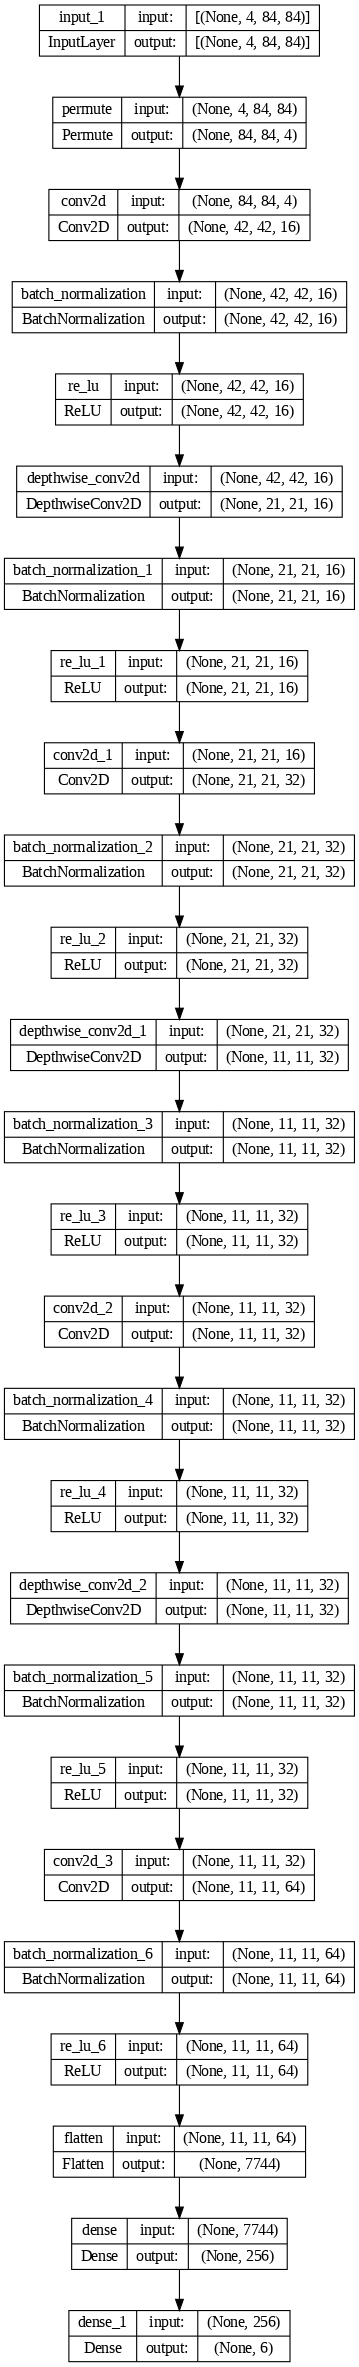

In [11]:
plot_model(model_like_dqn,show_shapes=True, dpi=80)

## **2. Implementación de la solución DQN**

In [12]:
# memoria
memory = SequentialMemory(limit=100000, window_length=WINDOW_LENGTH)

# Procesador
processor = AtariProcessor()

# Polícia de exploración
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1.0, value_min=0.1, value_test=0.05, nb_steps= 150000 )# 500000)

In [13]:
# Agente
dqn_like_dqn = DQNAgent(
    model=model_like_dqn,
    nb_actions=num_actions,
    policy=policy,
    memory=memory,
    processor=processor,
    nb_steps_warmup = 200000, #75000, #50000, # indica cuántos pasos (interacciones con el entorno) el agente debe ejecutar antes de comenzar a entrenar el modelo
    gamma=GAMMA,
    enable_double_dqn=True,
    target_model_update = TARGET_MODEL_UPDATE,
    train_interval = TRAIN_INTERVAL,
    delta_clip = DELTA_CLIP
)

optimizer = Adam(lr=LEARNING_RATE)
#optimizer = Adam(learning_rate = LEARNING_RATE)

/usr/local/lib/python3.11/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
# Compilar el agente
dqn_like_dqn.compile(optimizer=optimizer, metrics=['mae'])

In [15]:
#total_steps = 1000000
#save_every = 250000  # pasos entre guardados
#steps_done = 0

#while steps_done < total_steps:
#    print(f"\n➡️ Entrenando desde el paso {steps_done} hasta {steps_done + save_every}...")
#    dqn.fit(env, nb_steps=save_every, visualize=False, verbose=1)
#    --dqn.fit(env, nb_steps=1000000, log_interval=10000, visualize=False)
#    steps_done += save_every

    # Guardar pesos
#    weight_filename = f'dqn_spaceinvaders_weights_{steps_done}.h5f'
#    dqn.save_weights(weight_filename, overwrite=True)
#    --print(f"Pesos guardados: {weight_filename}")


In [16]:
# Definimos un Callbak para poder guardar los mejores pesos cada 20 iteraciones
class SaveBestWeights(Callback):
    def __init__(self, filepath, interval=20, overwrite=True):
        super(SaveBestWeights, self).__init__()
        self.filepath = filepath
        self.interval = interval
        self.best_reward = -float('inf')
        self.overwrite = overwrite

    def on_episode_end(self, episode, logs={}):
        if episode % self.interval == 0:
            current_reward = logs.get('episode_reward')
            if current_reward > self.best_reward:
                self.best_reward = current_reward
                if self.overwrite or not os.path.exists(self.filepath):
                    self.model.save_weights(self.filepath, overwrite=True)
                    print(f'\n ##### Pesos guardados en {self.filepath} recompensa: {self.best_reward}')
                else:
                    print(f'\n ##### Warning: No se sobrescribió {self.filepath}, ya existe.')


# Definimos un Callbak para poder guardar los ultimos pesos cada 10 iteraciones, sin importar si mejoró el resultado del modelo
class SaveLastWeights(Callback):
    def __init__(self, filepath, interval=10):
        super(SaveLastWeights, self).__init__()
        self.filepath = filepath
        self.interval = interval

    def on_episode_end(self, episode, logs={}):
        if episode % self.interval == 0:
            self.model.save_weights(self.filepath, overwrite=True)
            print(f'\n ##### Pesos guardados en {self.filepath} al final del episodio {episode}')

########--------------  modelo 4  ------------------###########
Training for 500000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 616/5000 [==>...........................] - ETA: 23s - reward: 0.0179
 ##### Pesos guardados en POC4/modelos/dqn_best_weights.h5 recompensa: 11.0

 ##### Pesos guardados en POC4/modelos/dqn_last_weights.h5 al final del episodio 0
5000/5000 [==============================] - 27s 5ms/step - reward: 0.0144
7 episodes - episode_reward: 9.286 [6.000, 13.000] - ale.lives: 2.101

Interval 2 (5000 steps performed)
5000/5000 [==============================] - 26s 5ms/step - reward: 0.0138
7 episodes - episode_reward: 9.714 [5.000, 16.000] - ale.lives: 1.991

Interval 3 (10000 steps performed)
5000/5000 [==============================] - 26s 5ms/step - reward: 0.0134
9 episodes - episode_reward: 7.222 [4.000, 11.000] - ale.lives: 2.156

Interval 4 (15000 steps performed)
5000/5000 [==============================] - 26s 5ms/step - reward: 0.0140
9 episodes - episode_reward: 8.333 [3.000, 16.000] - ale.lives: 2.047

Interval 5 (20000 steps performed)
5000/5000 [==============================] - 2

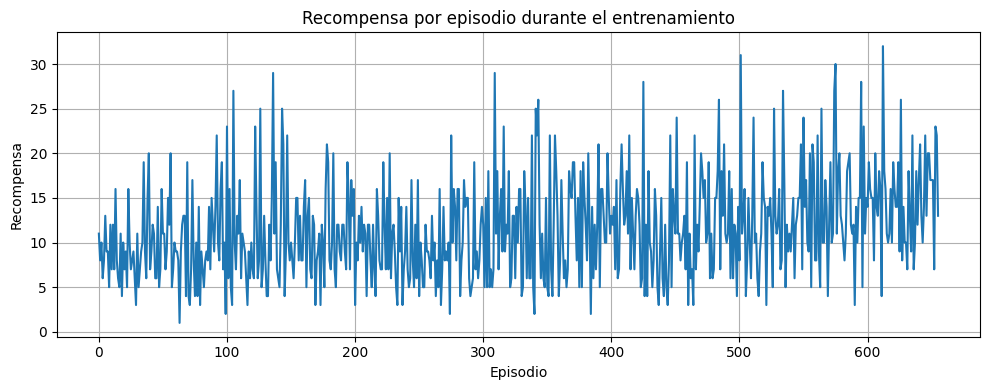

Entrenamiento completado en 14740.85 segundos (245.68 minutos)
Testing for 10 episodes ...
Episode 1: reward: 18.000, steps: 706
Episode 2: reward: 18.000, steps: 722
Episode 3: reward: 18.000, steps: 713
Episode 4: reward: 18.000, steps: 712
Episode 5: reward: 18.000, steps: 717
Episode 6: reward: 18.000, steps: 731
Episode 7: reward: 18.000, steps: 713
Episode 8: reward: 18.000, steps: 718
Episode 9: reward: 18.000, steps: 718
Episode 10: reward: 18.000, steps: 719
18 ~ 18 Mean 18.0


In [17]:
path = 'POC4'

# Define subdirectorios
videos_path = os.path.join(path, 'videos')
modelos_path = os.path.join(path, 'modelos')

# Crear directorios si no existen
os.makedirs(videos_path, exist_ok=True)
os.makedirs(modelos_path, exist_ok=True)

log_filename = os.path.join(modelos_path, f'dqn_{env_name}_log.json')

filepath_bw = os.path.join(modelos_path, 'dqn_best_weights.h5')
save_best_weights = SaveBestWeights(filepath=filepath_bw, interval=50, overwrite=True)

filepath_lw = os.path.join(modelos_path, 'dqn_last_weights.h5')
save_last_weights = SaveLastWeights(filepath=filepath_lw, interval=50)

print("########--------------  modelo 4  ------------------###########")

start_time = time.time()

train_scores = dqn_like_dqn.fit(env, nb_steps=500000, visualize=False, verbose=1, log_interval=5000,
                       callbacks=[save_best_weights, save_last_weights, FileLogger(log_filename, interval=100)])

#################################

episode_rewards = train_scores.history['episode_reward']

plt.figure(figsize=(10,4))
plt.plot(episode_rewards)
plt.title("Recompensa por episodio durante el entrenamiento")
plt.xlabel("Episodio")
plt.ylabel("Recompensa")
plt.grid(True)
plt.tight_layout()
plt.show()

######################

end_time = time.time()
training_duration = end_time - start_time

print(f"Entrenamiento completado en {training_duration:.2f} segundos ({training_duration/60:.2f} minutos)")

weights_filename = os.path.join(modelos_path, 'dqn_last_weights.h5')
dqn_like_dqn.load_weights(weights_filename)
test_scores = dqn_like_dqn.test(env, nb_episodes=10, visualize=False)

episode_rewards = test_scores.history['episode_reward']
print(int(np.min(episode_rewards)), "~", int(np.max(episode_rewards)), "Mean", np.mean(episode_rewards))

In [18]:
# Mostrar métricas
print("Resultados del agente entrenado:")
print(f"Recompensas: {episode_rewards}")
print(f"Min:   {np.min(episode_rewards)}")
print(f"Max:   {np.max(episode_rewards)}")
print(f"Media: {np.mean(episode_rewards):.2f}")
print(f"Desviación estándar: {np.std(episode_rewards):.2f}")

Resultados del agente entrenado:
Recompensas: [18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0]
Min:   18.0
Max:   18.0
Media: 18.00
Desviación estándar: 0.00


In [19]:
# Testing part to calculate the mean reward
#weights_filename = 'dqn_{}_weights.h5f'.format(env_name)
#dqn.load_weights(weights_filename)
#dqn.test(env, nb_episodes=10, visualize=False)

## **3. Justificación de los parámetros seleccionados y de los resultados obtenidos**

---